Linear Regression using SKlearn

In [45]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import copy,math
from lab_utlis_common import *



 PROBLEM STATEMENT : 

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.
The chain already has restaurants in various cities and you have data for profits and populations from the cities.
You also have data on cities that are candidates for a new restaurant.
For these cities, you have the city population.
Can you use the data to help you identify which cities may potentially give your business higher profits?

In [46]:
# load the data for one feature data 
def load_data():
    data = np.loadtxt('data\ex1data1.txt',delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X,y

#load the data for multifeature data 

def load_data_multi():
    data = np.loadtxt('data\ex1data2.txt',delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X,y

First we will do the training for one feature data 

In [47]:
X_train , y_train = load_data()

print(X_train[:5] , y_train[:5]) # first five data points

[6.1101 5.5277 8.5186 7.0032 5.8598] [17.592   9.1302 13.662  11.854   6.8233]


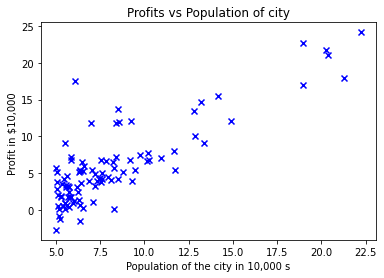

In [48]:
# we need to see the data spread and the relation with the plot
plt.scatter(X_train, y_train,marker='x',c = 'b' )
plt.title('Profits vs Population of city')
plt.xlabel('Population of the city in 10,000 s')
plt.ylabel('Profit in $10,000 ')

plt.show()

In [49]:
# we talk about the shape of our data 
print(f" The shape of our input data is {X_train.shape}")
print(f"The shpae of our output data is {y_train.shape}")
print(f"The number of training examples is m = ( {len(X_train)} )" )

 The shape of our input data is (97,)
The shpae of our output data is (97,)
The number of training examples is m = ( 97 )


First we will write gradient descent by hand then use the linear regressor from Sk learn

WHAT WE REQUIRE: 
    1. gradient fucntion 
    2. cost fucntion
    3. gradient descent fucntion


We already have these fucntions in the lab_utils_common

In [50]:
# we declare initial parameters 

initial_w = 2
initial_b = 1

cst = compute_cost(X = X_train,y=y_train,w = initial_w,b=initial_b)
print(f" the initial cost for the paramters w = {initial_w}  and b = {initial_b}  is : {cst}")

 the initial cost for the paramters w = 2  and b = 1  is : 75.20338497891959


In [51]:
# now we run gradient descenet 
w_final , b_final = gradient_desc(X=X_train,y=y_train,w_in= initial_w,b_in=initial_b,alpha= 1e-2,num_iters=100000,cost_function= compute_cost,gradient_function=compute_gradient)
print(w_final,b_final)

1.193033644189581 -3.895780878311729


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


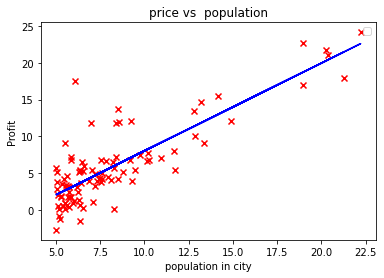

In [52]:
# prediction 
prediced = X_train*w_final + b_final

# we will no plot graphs 
plt.scatter(X_train,y_train,marker='x',c = 'r',)
plt.plot(X_train,prediced,c='b')

plt.legend()
plt.title('price vs  population')
plt.xlabel('population in city')
plt.ylabel('Profit')
plt.show()


In [53]:
#prediction for a data

predict1 = 3.5 * w_final + b_final
predict2 = 7 * w_final + b_final

print(f" the predicted values are for 3.5 : {predict1*10000}  for 7 : {predict2*10000} ")

 the predicted values are for 3.5 : 2798.3687635180445  for 7 : 44554.546310153375 


NOW we use linear model from sk learn

In [55]:


linear_mod = LinearRegression()

linear_mod.fit(X_train.reshape(-1,1),y_train)


LinearRegression()

In [56]:
w = linear_mod.coef_
b = linear_mod.intercept_

print(f"the learned parameters are w = {w}, b = {b} ")

the learned parameters are w = [1.19303364], b = -3.895780878311852 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


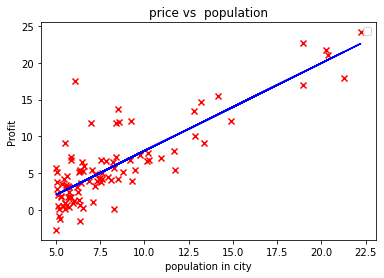

In [58]:
y_pred = linear_mod.predict(X_train.reshape(-1,1))
plt.scatter(X_train,y_train,marker='x',c = 'r',)
plt.plot(X_train,y_pred,c='b')

plt.legend()
plt.title('price vs  population')
plt.xlabel('population in city')
plt.ylabel('Profit')
plt.show()


In [59]:
predict1 = 3.5 * w + b
predict2 = 7 * w + b

print(f" the predicted values are for 3.5 : {predict1*10000}  for 7 : {predict2*10000} ")

 the predicted values are for 3.5 : [2798.36876352]  for 7 : [44554.54631015] 
